# Example: comparing survey fields to galaxy/QSO catalogs

In [1]:
%pylab inline
import numpy as np
import healpy as hp
import matplotlib.pyplot as pl
import hera_cc_utils as hera_cc
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


To start, let's grab a set of maps, including the GSM (for background color-scale), and survey footprints for HERA, Roman, and Euclid:

In [2]:
gsm = hera_cc.Map(data='gsm')

hera_stripe = hera_cc.Map(data='hera')

roman_hls = hera_cc.Map(data='roman')
euclid_fornax = hera_cc.Map(data='euclid_fornax')
euclid_south = hera_cc.Map(data='euclid_south')

We also have the survey fields for the wide-field surveys being done by Subaru HSC:

In [3]:
hsc_spring = hera_cc.Map(data='hsc_spring')
hsc_fall = hera_cc.Map(data='hsc_fall')

Now, let's compare these various survey fields:

(-40.0, 8.0)

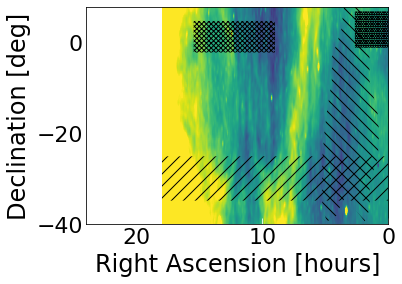

In [4]:
# Set the GSM at 150 MHz as the backdrop
fig, ax, proj, img = gsm.plot_map(freq=150e6, projection='rectilinear', num=1,
    norm=LogNorm(1e2, 5e2))

# Overplot cross-hatched regions for HERA and Roman
fig2, ax2, proj2, img2 = hera_stripe.plot_map(projection='rectilinear',  
    hatches='//', ax=ax, alpha=0)
fig3, ax3, proj3, img3 = roman_hls.plot_map(projection='rectilinear', ax=ax, 
    hatches='\\\\', alpha=0)

# Add HSC wide fields
fig3, ax3, proj3, img3 = hsc_spring.plot_map(projection='rectilinear', ax=ax, 
    hatches='xxxxx', alpha=0)
fig3, ax3, proj3, img3 = hsc_fall.plot_map(projection='rectilinear', ax=ax, 
    hatches='ooooo', alpha=0)

# Zoom-in a bit
ax.set_ylim(-40, 8)


The HSC surveys are too far north for overlap with HERA. Could've figured this out easily just be reading off the Dec range, but here it is.

Finally, let's see if there are any quasars in the HERA stripe. We've started transcribing the basic properties of known quasars in the right declination range, $-35 \lesssim \delta \lesssim -25$, in `hera_cc_utils.catalog`, though the collection is very likely incomplete.

First, let's plot the HERA stripe as per usual, and then overplot the positions of all QSOs we know about so far:

(12.0, 0.0)

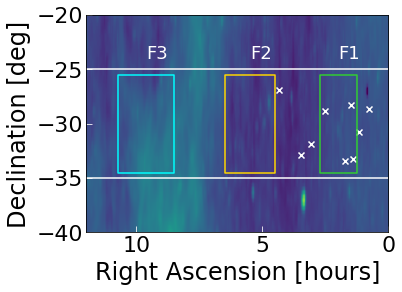

In [5]:
# Set the GSM at 150 MHz as the backdrop
fig, ax, proj, img = gsm.plot_map(freq=150e6, projection='rectilinear', num=1,
    norm=LogNorm(1e2, 3e3))

lst_colors = ['limegreen', 'gold', 'cyan']
lst_cuts = [(1.25, 2.7), (4.5, 6.5), (8.5, 10.75)]
for i, lc in enumerate(lst_cuts):
    ax.fill_between([lc[0], lc[1]], -34.5, -25.5, facecolor='none',
        edgecolor=lst_colors[i],
        alpha=1, zorder=5, lw=1.5)
    ax.text(np.mean(lc), -24, "F{}".format(i + 1), fontsize=18, c='w')

# Overplot cross-hatched regions for HERA and Roman
ax.axhline(-35, color='w', ls='-')
ax.axhline(-25, color='w', ls='-')
ax.set_ylim(-40, -20)

# Overplot QSO positions
cat = hera_cc.Catalog('qsos')
names, qsos = cat.get_all_pos(zmin=None)

for i, qso in enumerate(qsos):
    ra, dec, z = qso
    ax.scatter(ra, dec, color='w', marker='x')

ax.set_xlim(12, 0)

Looks like we've got some! 

**NOTE: so far this is only set up to work when over-plotting on maps in recti-linear projection.** 